In [1]:
import numpy as np
import pandas as pd

## 1. load data

In [2]:
cs_train = pd.read_csv('../cs-training.csv')
del cs_train['Unnamed: 0']
cs_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [3]:
cs_train.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [4]:
cs_train = cs_train.fillna(cs_train.mean().round())
cs_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,6670.0,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    cs_train.drop('SeriousDlqin2yrs', axis = 1), cs_train['SeriousDlqin2yrs'], 
    test_size=0.3, random_state=1, stratify=cs_train['SeriousDlqin2yrs'])

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 2. feature selection

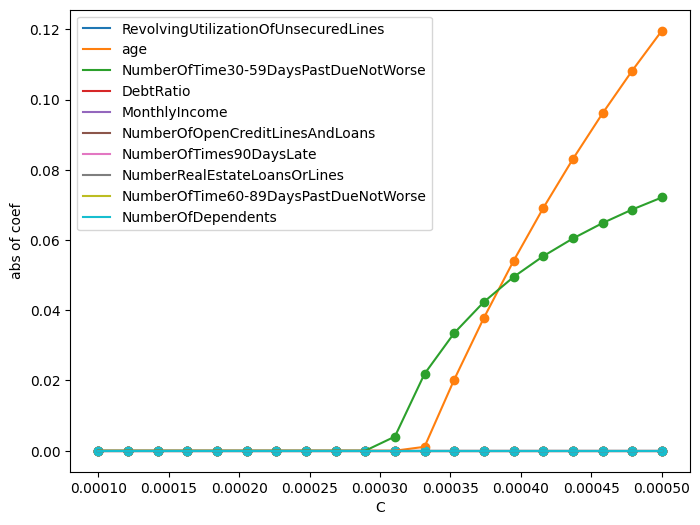

In [6]:
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt

Cs = np.linspace(1e-4, 5*1e-4, num = 20)
coefs = []

for this_C in Cs:
    lr = LR(C=this_C, random_state=1, penalty='l1', solver='liblinear')
    lr.fit(X_train_std, y_train)
    coefs.append(np.abs(lr.coef_[0]))
coefs = np.array(coefs)

plt.figure(figsize=[8, 6])
labels = cs_train.columns[1:].values
for i in range(10):
    plt.plot(Cs, coefs[:, i], label = labels[i])
    plt.scatter(Cs, coefs[:, i])
plt.legend()
plt.xlabel('C')
plt.ylabel('abs of coef')
plt.show()

the 2 most important features using LogisticRegression with L1 penalty is 

**age** and **NumberOfTime30-59DaysPastDueNotWorse**

In [7]:
X_train_select = X_train_std[:,[1, 2]]
X_test_select = X_test_std[:,[1, 2]]

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

In [9]:
X_combined_std = np.vstack((X_train_select, X_test_select))
y_combined = np.hstack((y_train, y_test))

## LR

C = 0.0005 : test score = 0.933156 train score = 0.933162
C = 0.00056 : test score = 0.933156 train score = 0.933162
C = 0.00061 : test score = 0.933156 train score = 0.933162
C = 0.00067 : test score = 0.933089 train score = 0.93299
C = 0.00072 : test score = 0.933178 train score = 0.933057
C = 0.00078 : test score = 0.9332 train score = 0.933057
C = 0.00083 : test score = 0.933289 train score = 0.933124
C = 0.00089 : test score = 0.933311 train score = 0.933124
C = 0.00094 : test score = 0.933311 train score = 0.933114
C = 0.001 : test score = 0.933289 train score = 0.933114

the best model is: C = 0.00089 score = 0.9333111111111111


<ipython-input-8-5347af230dfc>:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


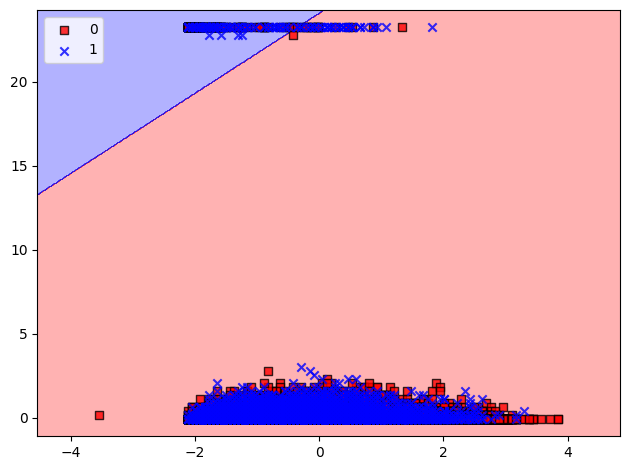

In [13]:
from sklearn.linear_model import LogisticRegression as LR

C_set = np.linspace(5*1e-4, 1e-3, num = 10)
score = 0
C_best = 0
model_best = None

for C_this in C_set:
    lr = LR(C=C_this, random_state=1, penalty='l1', solver='liblinear')
    lr.fit(X_train_select, y_train)
    this_score = lr.score(X_test_select, y_test)
    print(f'C = {C_this.round(5)} : test score = {this_score.round(6)} train score = {lr.score(X_train_select, y_train).round(6)}')
    if this_score > score:
        score = this_score
        C_best = C_this
        model_best = lr
print(f'\nthe best model is: C = {C_best.round(5)} score = {score}')

plot_decision_regions(X_combined_std, y_combined,
                      classifier=model_best)
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()